# Group 36 - Glass Prediction Project Proposal

### **Introduction:**

Different elements and variations in refractive index play a critical role in the formulation and properties of various types of glass. With this information, we are able to predict which glass is most likely to form with the elements presented and the refractive index. 

**We want to answer the question of:**
To predict the type of glass of an unknown glass sample with KNN model trained with our dataset.

**Identify and describe the dataset that will be used to answer the question:**
The dataset is composed of the refractive index as well as eight different elements to represent the type of glass the combination of those elements and refractive index represent. 

**Preliminary exploratory data analysis:**
Demonstrate that the dataset can be read from the web into R 
Clean and wrangle your data into a tidy format

**Using only training data:**
Summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

**Using only training data:**
Visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

### **Method**
**Explain how you will conduct either your data analysis and which variables/columns you will use:**
We will conduct our data analysis by implementing the KNN principle. KNN works on the fundamental idea that similar things are close to each other. This similarity can be measured using distance metrics using the Euclidean distance. We will be using all variables on the dataset to get a more accurate prediction to the type of glass. 

**Describe at least one way that you will visualize the results:**
At least two columns (ex. Si Level and Reflective Index) will be graphed separately and compared to the new dataset of Si Level and Reflective Index to help visualize to readers why it was classified into the classification of Glass. 



### Glass Dataset

**Type of Glass** \
1 : Building Windows (float-processed) \
2 : Building Windows (non-float-processed) \
3 : Vehicle Windows (float-processed) \
4 : Vehicle Windows (non-float-processed) *none in this dataset* \
5 : Containers \
6 : Tableware \
7 : Headlamps 

Source: German,B.. (1987). Glass Identification. UCI Machine Learning Repository. https://doi.org/10.24432/C5WW2P.

In [12]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
options(repr.matrix.max.rows = 6)
library(RColorBrewer)
library("ggplot2")

In [13]:
#Read in dataset
names <- c("ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type")
glass <- read.csv(url("http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"), header=FALSE)
colnames(glass) = names
glass <- glass |> select(-ID) |> mutate(Type = as_factor(Type))
glass

RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0,1
1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0,1
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1.52065,14.36,0,2.02,73.42,0,8.44,1.64,0,7
1.51651,14.38,0,1.94,73.61,0,8.48,1.57,0,7
1.51711,14.23,0,2.08,73.36,0,8.62,1.67,0,7


In [14]:
#Splitting data into testing and training data
glass_split <- initial_split(glass, prop = 0.75, strata = Type)
glass_train <- training(glass_split)
glass_test <- testing(glass_split)

In [37]:
#Summarize Data into at least one table

#The mean value of each characteristic of each type of glass
glass_mean <- glass |>
    group_by(Type) |>
    summarize(across(everything(), mean))
glass_mean

#Count of how many observations there are for each type of glass
glass_type <- glass |> count(Type)
glass_type

Type,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.518718,13.24229,3.5524286,1.163857,72.61914,0.4474286,8.797286,0.012714286,0.05700000
2,1.518619,13.11171,3.0021053,1.408158,72.59803,0.5210526,9.073684,0.050263158,0.07973684
3,1.517964,13.43706,3.5435294,1.201176,72.40471,0.4064706,8.782941,0.008823529,0.05705882
5,1.518928,12.82769,0.7738462,2.033846,72.36615,1.4700000,10.123846,0.187692308,0.06076923
6,1.517456,14.64667,1.3055556,1.366667,73.20667,0.0000000,9.356667,0.000000000,0.00000000
7,1.517116,14.44207,0.5382759,2.122759,72.96586,0.3251724,8.491379,1.040000000,0.01344828


Type,n
<fct>,<int>
1,70
2,76
3,17
5,13
6,9
7,29


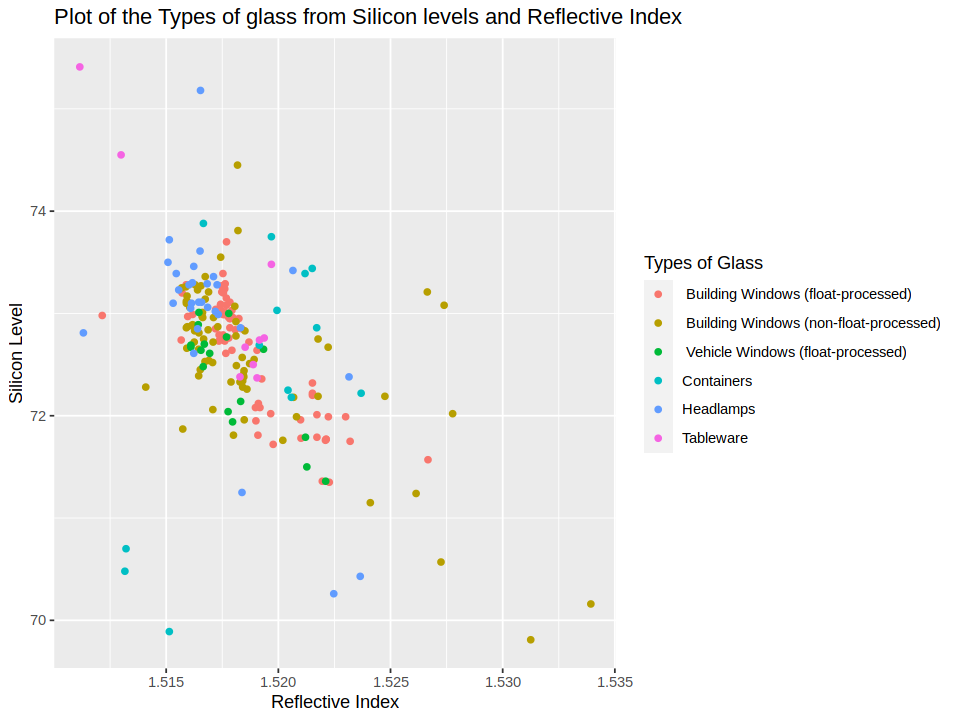

In [18]:
#Naming the Types of glass 
glass_name <- mutate(glass, Type = case_when(
    Type == 1 ~ " Building Windows (float-processed)",
    Type == 2 ~ " Building Windows (non-float-processed)",
    Type == 3 ~ " Vehicle Windows (float-processed)",
    Type == 4 ~ " Vehicle Windows (non-float-processed)",
    Type == 5 ~ "Containers",
    Type == 6 ~ "Tableware",
    Type == 7 ~ "Headlamps"))
#Visualize the data into at least one plot relevant
options(repr.plot.width = 8, repr.plot.height = 6) 

ri_si_plot <- ggplot(glass_name, aes(x = RI, y = Si, group = Type)) +
    geom_point(aes(color = Type)) +
    labs(title = "Plot of the Types of glass from Silicon levels and Reflective Index", 
            x = "Reflective Index",
            y = "Silicon Level",
            color = "Types of Glass")

           
ri_si_plot

### **Expected outcomes and significance** 

**What do you expect to find?:**
To be able to predict new types of glass into the seven categories we have. 

**What impact could such findings have?:**
Determining the type and origin of ancient glass artifacts can provide insights into ancient trade routes, technologies, and cultural interactions. 
Accurately categorizing different types of glass can lead to more efficient sorting processes. This ensures that each type of glass is processed using the most suitable method, enhancing the quality of the recycled product. 

**What future questions could this lead to?:**
Can the model be adapted to predict other properties of glass, such as its strength, thermal conductivity, or light transmittance? 